# xarray

O xarray torna o trabalho com arrays multidimensionais rotulados em Python simples, eficiente e divertido!

In [1]:
!pip install xarray
!pip install scipy

In [2]:
# !pip list
import xarray as xr

nc = xr.open_dataset('./../dados/wrfout_d02_2019-11-29_00:00:00')

In [3]:
nc

<xarray.Dataset>
Dimensions:                (Time: 805, south_north: 120, west_east: 120,
                            bottom_top: 43, bottom_top_stag: 44,
                            soil_layers_stag: 4, west_east_stag: 121,
                            south_north_stag: 121, seed_dim_stag: 12)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag, seed_dim_stag
Data variables: (12/187)
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 ...
    PC                     (Time, south_north, west_east) float32 ...
    LANDMASK               (Time, south_north, west_east) float32 ...
    LAKEMASK               (Time, south_north, west_east) float32 ...
    SST                    (Time, south_north, west_east) float32 ...
    SST_INPUT              (Time, south_north, west_east) float32 ...
Attributes: (12/131)
    TITLE:                            OUTPUT FROM WRF V4.3.3 MODEL
    START_DATE:                      2019-11-29_00:00:00
    SIMULATION_START_DATE:           2019-11-29_00:00:00
    WEST-EAST_GRID_DIMENSION:        121
    SOUTH-NORTH_GRID_DIMENSION:      121
    BOTTOM-TOP_GRID_DIMENSION:       44
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [4]:
nc.U10

<xarray.DataArray 'U10' (Time: 805, south_north: 120, west_east: 120)>
[11592000 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) datetime64[ns] 2019-11-29 ... 2020-01-01T12:00:00
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  U at 10 M
    units:        m s-1
    stagger:

In [5]:
import numpy as np
vel_t = np.sqrt(np.power(nc.U10.isel(south_north=-20, west_east=-40), 2) + np.power(nc.V10.isel(south_north=-20, west_east=-40), 2))

In [6]:
vel_t

<xarray.DataArray (Time: 805)>
array([ 5.5157456 ,  8.52844   ,  8.019357  ,  7.2443595 ,  6.65249   ,
        5.728986  ,  3.7584167 ,  2.5497856 ,  2.3715732 ,  2.792248  ,
        3.2353258 ,  4.3461814 ,  4.3022165 ,  6.2746463 ,  6.1788497 ,
        5.748322  ,  6.092481  ,  5.9024854 ,  6.026979  ,  5.0986176 ,
        4.216524  ,  5.738468  ,  6.3059764 ,  5.9013915 ,  5.0449057 ,
        3.6669862 ,  3.3418026 ,  3.0987155 ,  2.781299  ,  2.832331  ,
        2.8319225 ,  2.7599406 ,  2.406104  ,  2.4445987 ,  2.8129826 ,
        2.720116  ,  3.111479  ,  3.395816  ,  3.7313776 ,  3.673949  ,
        3.3154094 ,  3.8112326 ,  3.9724605 ,  3.9066677 ,  4.5392284 ,
        4.004672  ,  3.9327402 ,  3.993906  ,  3.8430274 ,  4.2712116 ,
        5.0362744 ,  6.0663457 ,  5.506846  ,  5.2736406 ,  5.4943295 ,
        5.3554664 ,  4.515303  ,  5.161872  ,  5.5097938 ,  6.107155  ,
        6.346058  ,  7.5660267 ,  6.928614  ,  7.0062237 ,  7.1464725 ,
        7.973571  ,  9.428185  , 10.410203  ,  9.752507  , 10.041558  ,
       11.2471895 , 12.36992   , 12.311903  ,  9.684353  ,  9.182536  ,
        8.394454  ,  7.141548  ,  6.4900713 ,  5.843943  ,  4.748661  ,
        4.350592  ,  4.2704167 ,  3.901768  ,  2.8652077 ,  2.3800206 ,
        7.0910764 ,  7.8247004 ,  8.097774  ,  8.501309  ,  9.091774  ,
        9.290257  , 10.394751  , 10.895589  , 10.645006  ,  9.99758   ,
        9.313495  ,  9.699724  ,  9.476849  ,  9.592329  ,  9.344807  ,
...
        3.7753801 ,  4.4171243 ,  4.8880677 ,  5.1710153 ,  5.491234  ,
        5.6686087 ,  5.569571  ,  5.436589  ,  5.725612  ,  5.6253204 ,
        5.137331  ,  3.876647  ,  3.2399206 ,  3.6124632 ,  2.7279294 ,
        2.5837657 ,  2.15781   ,  1.4114352 ,  0.73454475,  0.26749086,
        0.87769616,  2.3473394 ,  3.0095935 ,  3.4177635 ,  4.134413  ,
        4.4520903 ,  4.7103257 ,  4.8577313 ,  5.1955066 ,  4.9776416 ,
        4.543665  ,  4.110674  ,  4.077498  ,  4.3412104 ,  4.8396134 ,
        4.319013  ,  3.709959  ,  3.054783  ,  2.7093625 ,  2.5053642 ,
        2.00941   ,  2.2041755 ,  2.0536072 ,  2.5101502 ,  3.0967214 ,
        3.3729196 ,  3.9075997 ,  4.052834  ,  4.7297335 ,  5.2496786 ,
        5.654001  ,  5.742622  ,  5.375597  ,  4.8828845 ,  5.0899477 ,
        5.908535  ,  4.8886256 ,  5.5208163 ,  4.840754  ,  3.9839718 ,
        4.017157  ,  4.2120905 ,  3.6780424 ,  3.2829912 ,  2.968728  ,
        2.4742963 ,  1.0279368 ,  0.45342302,  1.6053816 ,  2.444949  ,
        2.7898898 ,  3.315775  ,  3.545857  ,  4.3855777 ,  5.513402  ,
        6.388586  ,  6.958947  ,  7.192217  ,  7.5059137 ,  7.498605  ,
        7.5019    ,  7.386247  ,  7.3198886 ,  5.4883647 ,  5.208315  ,
        4.501477  ,  4.553136  ,  4.446426  ,  3.7332478 ,  3.0089726 ,
        2.2014205 ,  2.056077  ,  2.5548003 ,  2.9055893 ,  3.2456172 ],
      dtype=float32)
Coordinates:
    XLAT     (Time) float32 -19.15 -19.15 -19.15 -19.15 ... -19.15 -19.15 -19.15
    XLONG    (Time) float32 -39.7 -39.7 -39.7 -39.7 ... -39.7 -39.7 -39.7 -39.7
    XTIME    (Time) datetime64[ns] 2019-11-29 ... 2020-01-01T12:00:00
Dimensions without coordinates: Time

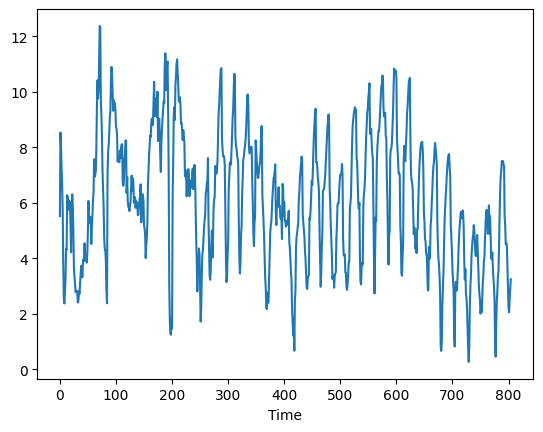

In [7]:
vel_t.plot()

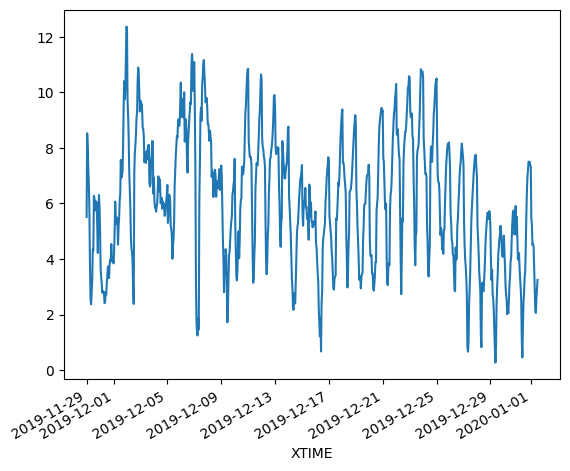

In [8]:
vel_t.plot(x='XTIME')

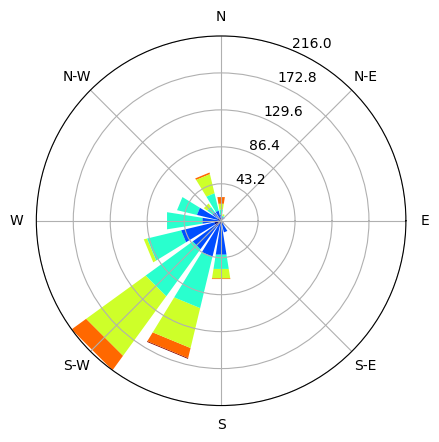

In [9]:
# !pip install windrose
# !pip install metpy
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import metpy.calc

u = nc.U10.isel(south_north=-20, west_east=-40)
v = nc.V10.isel(south_north=-20, west_east=-40)
vel = metpy.calc.wind_speed(u, v)
dir = metpy.calc.wind_direction(u, v, convention='to')

fig = plt.figure()
ax = fig.add_subplot(111, projection='windrose')
ax.bar(dir, vel)
# ax.legend()

In [10]:
import numpy as np

vel = np.sqrt(np.power(nc.U10.isel(Time=0), 2) + np.power(nc.V10.isel(Time=0), 2))

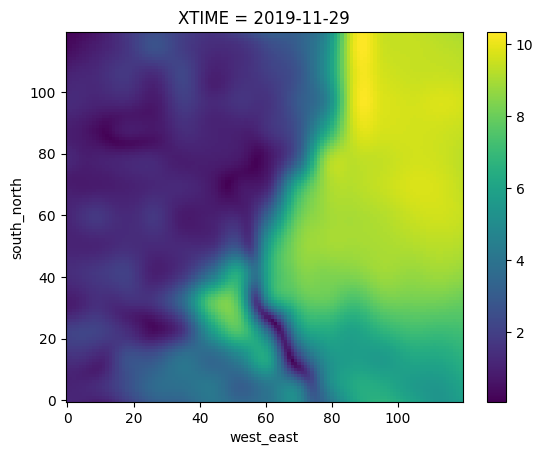

In [11]:
vel.plot()

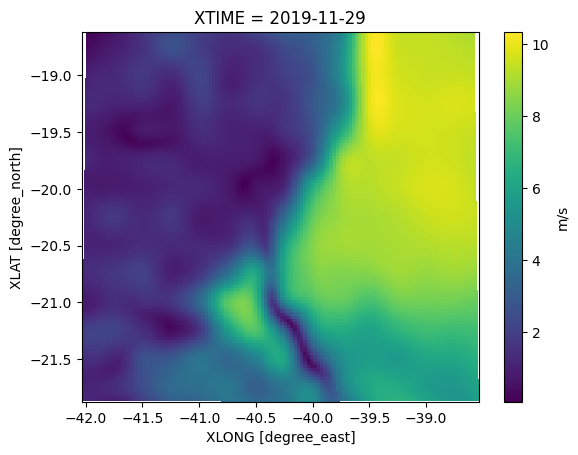

In [12]:
vel.plot(x='XLONG', y='XLAT', cbar_kwargs={'label': 'm/s'})